# Training Models

* linear regression Models
    * direct "closed-form" equation
    * Gradient Descent (GD)

* polynomial regression (for nonlinear datasets)
    * overfitting
    * learning curves
    * regularization

* logistic regression

* softmax regression

# Linear Regression

A linear model makes a prediction by computing a weighted sum of the input features, plus a constant called the bias term (intercept term).

* (linear regression model prediction) : $y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_nx_n$
* (...in vectorized form) ------------ : $y = h_\theta(x) = \Theta.x$

    * **_$\Theta$_** is the model's **_parameter vector_**, including the bias term $\theta_0$ and the feature weightes $\theta_1$ to $\theta_n$
    * **_x_** is the instance's **_feature vector_**, including $x_0$ to $x_n$ with $x_0$=1 
    * **_$\Theta$.x_** is the **_dot product_** of the two vectors (NOT the multiplication of the two vectors!)
    * **__$h_\theta$__** is the **_hypothesis function_**, using the model parameters **_$\Theta$_**

To train a linear regression model is to find the value of zeta (parameter vector) that minimize the Root Mean Squared Error (RMSE).

Mean Squared Error (MSE) cost function : **_MSE(X, h_zeta)_**, or, MSE(zeta)

In [1]:
# set up code

# check if python >= 3.5 
import sys
assert sys.version_info >= (3, 5)

# check if scikit-learn is >= 0.20
import sklearn
assert sklearn.__version__ >= '0.20'

# common imports
import numpy as np
import os

# set a fixed random seed
np.random.seed(42)

# plot pretty figures
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# save figure
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'training_linear_models'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# ignore warnings
import warnings
warnings.filterwarnings(action='ignore', message='^internal gelsd')

# normal equation

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


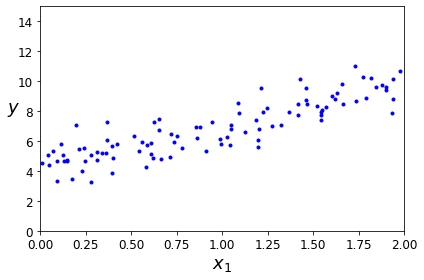

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig('generated_data_plot')
plt.show()

## manually calculate theta_best using normal equation and make a prediction

In [4]:
# add x0=1 to each instance
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
# make prediction using theta_best
X_new = np.array([[0], [2]])
# add x0=1 to each instance
x_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = x_new_b.dot(theta_best)
y_predict


array([[4.21509616],
       [9.75532293]])

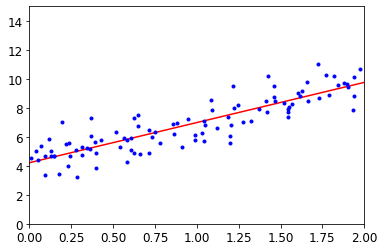

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Saving figure linear_model_predictions_plot


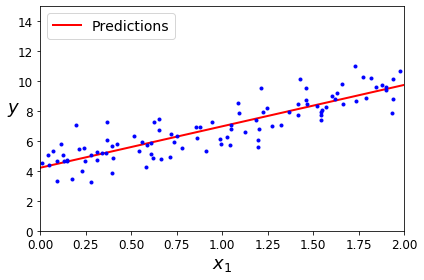

In [7]:

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

## perform the same linear regression using scikit-learn

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print('the intercept is',   '\t:', lin_reg.intercept_)
print('the coefficient is', '\t:', lin_reg.coef_)
print('the prediction is:', '\n')
lin_reg.predict(X_new)

the intercept is 	: [4.21509616]
the coefficient is 	: [[2.77011339]]
the prediction is: 



array([[4.21509616],
       [9.75532293]])

## call scipy.linalg.lstsq() function

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

## computational complexity

# Gradient Descent

* the general idea: tweak parameters iteratively to minimize a cost function

* It measures the local gradient of the error function with regard to the parameter vector $\Theta$, and it goes in the direction of descending gradient until it reaches zero. 

* It ususally starts by filling $\Theta$ with random values (randomzied initialization). It will be improved gradually, with each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum. 

* The learning step size, or the **_learning rate_** hyperparameter, is proportional to the slope of the cost function, so the steps gradually get smaller.

* cost fuctions may have irregular shapes as compared to a bowl shape, i.e., it may have local minimum and plateau. 

* Small learing rate will take many iterations to converge, whereas large learning rate may risk jumpping over the converge point. 

* the MSE cost function for linear regression model is a **_convex function_** which guarantees a global minimum. 

* scales of the features in trainning data set may affect gradient descent. So, similar scales of the features obtained through Scikit-Learn's **_StandardScaler_** class are preferred.  

* training a model means searching through the **_parameter space_** to minimize a cost function. 

## Batch Gradient Descent

In [12]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # initiate random parameters

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


In [13]:
theta

array([[4.21509616],
       [2.77011339]])

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for interation in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('$x_1$', fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

Saving figure gradient_descend_plot


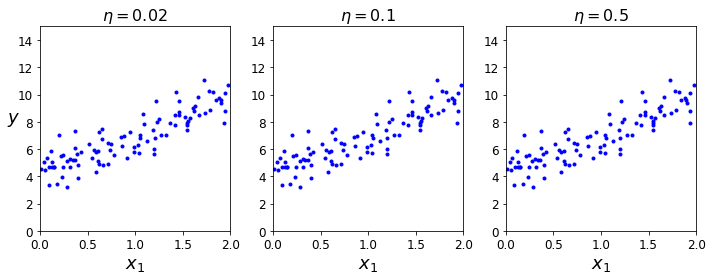

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig('gradient_descend_plot')
plt.show()